# Pràctica 6: Naive Bayes

## Gerard Santacatalina Rubio - 1534002

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Ús Naive Bayes Sci-kit Learn (60%)
* B. Implementació Naive Bayes (40%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.

<a href="https://www.flickr.com/photos/mattbuck007/3676624894"><img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/12/naive-bayes-classifier.jpg" width=500></a>


## Introducció

Els models Naive Bayes són un grup d’algoritmes de classificació extremadament ràpids i senzills que sovint són adequats per a conjunts de dades de molt alta dimensió.

Com que són tan ràpids i tenen tan pocs paràmetres, acaben sent molt útils com a ràpid baseline per a un problemes de classificació senzills.

Aquesta secció se centrarà en una explicació intuïtiva de com funcionen els classificadors ingenus de Bayes.


### Classificació bayesiana

Els classificadors de Bayes ingenus es basen en el teorema de Bayes, que és una equació que descriu la relació de probabilitats condicionals de quantitats estadístiques.

A la classificació bayesiana, ens interessa trobar la probabilitat d'una etiqueta donades algunes característiques observades, que podem escriure com $ P (y ~|~ X) $.

El teorema de Bayes ens explica com expressar-ho en termes de quantitats que podem calcular més directament:

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Utilitzant l'assumpció ingenua d'independencia condicional, podem simplificar la relació per tot $i$.

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Ja que $P(x_1, \dots, x_n)$ és constant donada una entrada, es pot utilitzar la següent simplificació, que será donarà un resultat proporcional al real, per tant, tindrem la mateixa sortida.

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

La classificació final s'obtindrà:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $$


Tingueu en compte que $P (y)$ també s’anomena **probabilitat de classe** i $P (x_i | y)$ s’anomena **probabilitat condicional**. 

Els diferents classificadors ingenus de Bayes es diferencien principalment pels supòsits que fan sobre la distribució de $P (x_i | y)$. 

Intentem aplicar la fórmula anterior manualment al nostre conjunt de dades meteorològiques. 
    

### Exemple:

Anem a veure un exemple [(extret d'aquesta web)](https://www.geeksforgeeks.org/naive-bayes-classifiers/). Considereu aquestes dades meteorològiques:

In [4]:
import pandas as pd

dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
display(dataGolf)

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


Haurem de fer algunes precomputacions al nostre conjunt de dades. Hem de trobar $P (x_i | y_j)$ per a cada $x_i$ a $X$ i $y_j$ a $y$. Tots aquests càlculs es mostren a les taules següents:


<img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification.png" width=500>



Cada taula ha calculat $P(x_i | y_j)$ per cada $x_i$ en $X$ i $y_j$ en $y$. Per exemple, la probabilitat de jugar a golf donat que la temperatura és fresca, és a dir, $P(temperature = Cool | PlayGolf = Yes) = 3/9$.

A més, hem de trobar les probabilitats de classe ($P (y)$). Per exemple, $P (PlayGolf = Yes) = 9/14$.

Ja podem fer servir el classificador ingenu de Bayes. Per exemple, si avui tenim aquestes condicions climatològiques, jugarem al golf?

In [5]:
today_golf = ['Sunny', 'Hot', 'Normal', False]

$P(Yes|today) = \frac{P(Outlook=Sunny|Yes) P(Temperature=Hot|Yes) P(Humidity=Normal|Yes) P(Wind=False|Yes) P(Yes)}{P(today)}$

$P(No|today) = \frac{P(Outlook=Sunny|No) P(Temperature=Hot|No) P(Humidity=Normal|No) P(Wind=False|No) P(No)}{P(today)}$

Ignorem el $P(today)$ per què es comú a les dues probabilitats, i calculem:

$$P(Yes|today) \propto \frac{2}{9}·\frac{2}{9}·\frac{6}{9}·\frac{6}{9}·\frac{9}{14} \simeq 0.0141 $$

$$P(No|today) \propto \frac{3}{5}·\frac{2}{5}·\frac{1}{5}·\frac{2}{5}·\frac{5}{14} \simeq 0.0068 $$

Podem normalitzar-ho per sumar 1, 
$$P(Yes|today) = \frac{0.0141}{0.0068+0.0141}=0.67$$
$$P(No|today) = \frac{0.0068}{0.0068+0.0141}=0.33$$

In [8]:
today_df_golf = pd.DataFrame([today_golf], columns = ['Outlook','Temperature', 'Humidity','Windy'])
today_df_golf 

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,Normal,False


In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

X_golf = dataGolf.drop("PlayGolf", axis="columns")
y_golf = dataGolf["PlayGolf"]

enc = OrdinalEncoder()
enc.fit(X_golf)
X_golf_encoded = enc.transform(X_golf)

model_cat = CategoricalNB(alpha=1)
model_cat.fit(X_golf_encoded, y_golf)


model_cat.predict_proba(enc.transform(today_df_golf))


array([[0.22086561, 0.77913439]])

### Tipus de Classificadors Naive Bayes
Tot el que necessitem ara és algun model per calcular **$ P(x_i \mid y) $** per a cada etiqueta, i n'existeixen varis depenent del tipus de dades. 

Podeu trobar l'explicació més precisa a la documentació, pero a continuació n'explicarem els trets fonamentals (Sabrieu dir quin model hem fet servir en l'exemple anterior?):

Tingueu en compte que $\alpha$ es un prior de suavització, i tenen en compte característiques no vistes durant l'aprenentatge. Impedeixen probabilitats nul·les en altres càlculs. Si $\alpha = 1$, s’anomena suavització de Laplace, mentre que $\alpha < 1$ s’anomena suavització de Lidstone.


#### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
Si tenim dades continues, i creiem que asumeixen una distribució normal, les podem modelitzar amb la mitja i la desviació estandar.
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

#### [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)
Es fa servir si tenim caracteristiques que compten occurencies. Per exemple, en text, si comptem quantes vegades apareix un terme en el document (una paraula). 

$$P(x_i \mid y)\sim \hat{\theta}_{yi} · x_i = \frac{ N_{yi} + \alpha}{N_y + \alpha n} · x_i$$

#### [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)
Si les dades són binaries, millor utilitzar aquesta problabilitat.

$$P(x_i \mid y) = P(i \mid y) · x_i + (1 - P(i \mid y)) · (1 - x_i)$$

#### [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)
Si les dades són categoriques.
$$P(x_i = t \mid y = c ; \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$



### Datasets

Es faràn servir varies bases de dades per comparar els mètodes més idonis depenent del tipus de dades:

* [**playgolf**](https://medium.com/@hrishavkmr/naive-bayes-in-machine-learning-5c0972340b76) (db: `playgolf.csv`)
* [**iris**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (db: `datasets.load_iris`)
* [**zoo**](https://www.kaggle.com/uciml/zoo-animal-classification) (db: `zoo_animal.csv`)
* [**heart-disease-uci**](https://www.kaggle.com/ronitf/heart-disease-uci) (db: `heart.csv`)
* [**20newsgroups**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) (db: `datasets.fetch_20newsgroups`) (Al appendix veure-ho com tranformar text en caracteristiques)


## A. Ús Naive Bayes Sci-kit Learn (60%)

En aquest apartat us recomano que feu ús de funcions propies per a llegir una base de dades, aplicar-hi un model, fer crosvalidacio i que retorni els resultats. D'aquesta forma podreu reaprofitar molt de codi.





Nota: la funció que he implementat de "comprova_nans" el propòsit que té és retornar-me la llista d'atributs o característiques del nostre dataset que tingui valors NaN's per poder tractar-los. En cas que no en tingui cap aleshores retornarà False. En aquest cas no he trobat cap valor NaN per les diferents característiques que tenim al dataset així que no s'ha donat una utilitat a aquesta funció però en cas d'haver tingut atributs NaN aquesta funció ens hagués retornat la llista d'atributs que haguéssim tingut que revisar per tal de tractar els valors inexistents i fer un model més estès pel que fa al tractament de nulls/nans com substituir-los per la mitjana de la resta de valors, fer un KNN per determinar alguna label en cas d'atributs categòrics o discrets, una regressió pel cas d'atributs continus etc. 

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

def comprova_nans(dataset):
    dic = {}
    for i in dataset:
        dic[i] = dataset[i].isnull().sum()  ##Per cada atribut del dataset comptem els NaN's que hi ha.
    if sum(dic.values()) == False:          ##Si la suma dels NaN's dels atributs és 0 aleshores retornem.
        return False
    return [i for i in dic.keys() if dic[i]>0]  ##Altrament retornem la llista dels atributs amb NaN's. 

def load_dataset(which):
    X, y = None, None
    # si s'han de netejar o codificar les dades, feu-ho aqui directament
    if which == "iris":
        dataIris = load_iris()
        X = pd.DataFrame(dataIris.data, columns=(dataIris.feature_names))
        y = pd.DataFrame({'Classificacio':dataIris.target})
        for i in [X, y]:
            L = comprova_nans(i)
            if not L:
                pass
            else:
                print("Tenim NaN's:\n", L)  ##Aquí si tenim NaN's doncs ja definiriem les operacions a realitzar i tal com a la pràctica 1...
        
    elif which == "playgolf":
        dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
        L = comprova_nans(dataGolf)
        X_g = pd.DataFrame(dataGolf.drop("PlayGolf", axis="columns"))
        y = pd.DataFrame(dataGolf["PlayGolf"])
        enc = OrdinalEncoder()
        enc.fit(X_g)
        X = enc.transform(X_g)
        if L:
            print("Tenim NaN's:\n", L)

    elif which == "zoo":
        dataZoo = pd.read_csv('zoo_animal.csv', delimiter=',')
        L = comprova_nans(dataZoo)
        X = pd.DataFrame(dataZoo.drop(["class_type", "animal_name"], axis="columns"))
        y = pd.DataFrame(dataZoo["class_type"])
        enc = OrdinalEncoder()
        enc.fit(X)
        X = enc.transform(X)
        if L:
            print("Tenim NaN's:\n", L)

    elif which == "heart-disease-uci":
        dataHDisease = pd.read_csv('heart.csv')
        L = comprova_nans(dataHDisease)
        X = pd.DataFrame(dataHDisease.drop("target", axis="columns"))
        y = pd.DataFrame(dataHDisease["target"])
        
        
        if L:
            print("Tenim NaN's:\n", L)
            
        
    elif which == "20newsgroups":
        dataNGroups = fetch_20newsgroups()
        categories_m = ['talk.religion.misc', 'soc.religion.christian',
            'sci.space', 'comp.graphics']
        train = fetch_20newsgroups(subset='train', categories=categories_m)
        test = fetch_20newsgroups(subset='test', categories=categories_m)
        return train, test
    
    elif which == "iris-bayes_imp": ##Aquesta forma de retornar les dades específicament per l'exercici B per 
                                    ## la implementació scratch del Naive Bayes per Gaussian.
        iris = load_iris()
        
        dataIris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                                columns = iris['feature_names'] + ['target'])
        X = dataIris.drop(['target'], axis='columns')
        y = dataIris['target']
   
    else:
        raise ValueError("UNKNOWN DATASET")
    
    return X, y

def experiment(dataset_name, model, debug=True):
    X, y = load_dataset(dataset_name)
    cross=0

    if X is None or y is None:
        return -1

    if debug:
        model.fit(X, y.values.ravel())
            
        if dataset_name in ["iris", "playgolf"]:
            cross = 5
        elif dataset_name=="zoo":
            cross = 2
            
        else:
            return model.score(X, y.values.ravel())
            
        return cross_val_score(model, X, y.values.ravel(), cv=cross)
    
    else:            
        try:
            model.fit(X, y)
            return model.score(X, y)
        except Exception as e:
            print('\033[91m'+"ERROR {}".format(e)+'\x1b[0m')
            return -100    
    


In [3]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.pipeline import make_pipeline
from statistics import mean
from sklearn.preprocessing import FunctionTransformer
from statistics import mean
from sklearn.preprocessing import OrdinalEncoder

models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB(alpha=1e-10), CategoricalNB(alpha=1)]
datasets = ["iris", "playgolf", "zoo", "heart-disease-uci"]
L = {}
for d in datasets:
    print("\nCROSSVALIDANT "+str(d))
    M = []
    for m in models:

        try:
            result = mean(experiment(d, m))
        except:
            result = experiment(d, m)
        
        M.append(round(result,3))
        
        print('{} + {:20} = {:.3f}'.format(d, str(m), (result)))
    L[d] = M
M = []
            
print("\nCROSSVALIDANT 20newsgroups")
train, test = load_dataset("20newsgroups")
for i in [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB(alpha=1e-10), CategoricalNB(alpha=1)]:
    model = make_pipeline(TfidfVectorizer(),FunctionTransformer(lambda x: x.todense(), accept_sparse=True),  i)
    model.fit(train.data, train.target)
    labels = model.predict(test.data)
    crossvalidacio = mean(cross_val_score(model, train.data, train.target))
    M.append(round(crossvalidacio,3))
    print("20newsgroups + "+str(i)+"        = "+str(round(crossvalidacio,3)))
L["20newsgroups"] = M
print("DONE")


CROSSVALIDANT iris
iris + GaussianNB()         = 0.953
iris + MultinomialNB()      = 0.953
iris + BernoulliNB()        = 0.333
iris + CategoricalNB(alpha=1e-10) = 0.933
iris + CategoricalNB(alpha=1) = 0.927

CROSSVALIDANT playgolf
playgolf + GaussianNB()         = 0.633
playgolf + MultinomialNB()      = 0.500
playgolf + BernoulliNB()        = 0.667
playgolf + CategoricalNB(alpha=1e-10) = 0.700
playgolf + CategoricalNB(alpha=1) = 0.567

CROSSVALIDANT zoo
zoo + GaussianNB()         = 0.951
zoo + MultinomialNB()      = 0.891
zoo + BernoulliNB()        = 0.940
zoo + CategoricalNB(alpha=1e-10) = 0.950
zoo + CategoricalNB(alpha=1) = 0.940

CROSSVALIDANT heart-disease-uci
heart-disease-uci + GaussianNB()         = 0.842
heart-disease-uci + MultinomialNB()      = 0.752
heart-disease-uci + BernoulliNB()        = 0.832
heart-disease-uci + CategoricalNB(alpha=1e-10) = 0.954
heart-disease-uci + CategoricalNB(alpha=1) = 0.911

CROSSVALIDANT 20newsgroups
20newsgroups + GaussianNB()        = 0.925
2

In [4]:
instancia_model = GaussianNB()
result = experiment('playgolf', instancia_model)
result

array([0.66666667, 1.        , 0.66666667, 0.33333333, 0.5       ])

#### Preguntes
1. Carrega els diferents datasets i explica quin tipus de classificador de bayes creieu que serà més adient per les dades.

2. Fés una taula mostrant el accuracy de cada model per cada un dels datasets. 

3. Mostra els resultats gràficament. Quin tipus de Bayes funciona millor per quin dataset. De mitjana, quin ho fa millor?

4. Et sorprenen el resultats? Com és possible que certs models funcionin per dades que en principi no haurien de funcionar? Explica els atributs més importants de cada classificador. Mostra'n exemples i analitza'ls.

5. Si el nostre dataset conté dades de diferent naturalesa, és a dir, uns atributs categorics, d'altres continus, d'altres binaris, creus que es podrien combinar els diferents classificadors de bayes? Seguint la formula original, com es faria? 


#### Pregunta 1: Carrega els diferents datasets i explica quin tipus de classificador de bayes creieu que serà més adient per les dades.

Aquí tenim 5 datasets diferents, els carregarem un a un i mirarem de quin tipus són els diferents atributs que els componen. El tipus de classificador que hauriem de fer servir varia depenent del dataset (les dades) del problema que haurem de tractar. Les característiques de les dades varien molt sovint en funció del problema que descriuen, és per això pel que no farem servir un classificador concret amb unes dades que molt probablement segueixin una distribució normal, amb atributs continus o en cas que tinguem atributs categòrics i fins i tot certs atributs que descriuen ocurrències com també veurem en aquesta pràctica pels cassos en els que tinguem dades referents a textos/documents. 

### load_iris:

In [5]:
X, y = load_dataset("iris")
X, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
      Classificacio
 0   

Aquí com podem veure tenim 4 atributs numèrics continus que descriuen unes característiques concretes d'unes flors. Després tenim l'atribut que en aquest cas seria el target (el que volem predir), que ens classifica les flors en tres categories: 0-1-2, versicolor-virginica-setosa. Aleshores com aquí tractem un problema on no tenim dades binaries, ni categòriques i tampoc descriuen ocurrències farem servir un tipus de classificador anomenat Gaussian Naive Bayes que ens modelitzarà les dades fent servir la seva mitjana i desviació estàndard. Aquest seria el classificador que jo escolliria primerament si hagués d'escollir un, basant-me en la naturalesa del problema que he descrit.

### play_golf:

In [6]:
dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
dataGolf

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


En aquest cas si ens fixem tenim 5 atributs en total. Un d'ells agafariem com a target, que en aquest cas seria el darrer atribut que veiem a la dreta "PlayGolf". Ens interesse saber aquí si es jugarà o no en base a la informació que tenim a la resta d'atributs, aleshores fixem aquest atribut com al nostre target. 
Pel que fa a la resta d'atributs si ens fixem veurem que els dos primers ("Outlook" i "Temperature") són atributs categòrics que categoritzen uns events concrets i els dos darrers ("Humidity" i "Windy") són atributs binaris, ens descriuen si un event passa o no passa. Aleshores aquí he estat dubtant entre els classificadors Bernoulli i Categorical Naive Bayes, perquè tenim exactament la mateixa quantitat d'informació a priori sense fer cap anàlisi tant d'un tipus com del altre. 
També es important fixar-se en que aquí tenim atributs no numèrics, aleshores això ho hauriem de codificar, farem servir el codificador que hem vist ja a la darrera pràctica i a classe amb el professor com és el OrdinalEncoder (podriem provar-ne d'altres però per manca de temps fem les nostres proves amb aquest). Una cosa que em sembla interessant seria veure la correlació que tenim entre els diferents atributs i per desempatar agafaria aquell model que tingués els dos atributs amb les correlacions més significants, és a dir, si els dos categòrics semblen tenir un impacte major sobre la nostra predicció el que faria seria agafar el Categorical Naive Bayes que potser ens donaria una precissió major sobre les prediccions futures que poguessim fer.

### zoo:

In [7]:
dataZoo = pd.read_csv('zoo_animal.csv', delimiter=',')
dataZoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Aquí el que veiem és un gran nombre d'atributs que ens descriuen un seguit de característiques sobre diferents animals, molts d'ells són de tipus binari perquè ens diuen si aquella característica simplement es dona o no en un animal concret com per exemple que aquest sigui aquàtic, que sigui vertebrat, que respiri, etc. Aleshores per la quantitat d'informació que ens donen aquests atributs per ser binaris ens llançariem a treballar amb el Bernoulli Naive Bayes.
Aquí el que ens interesse es classificar el animal en diferents classes (del 1 al 7), no ens importe aquí el nom del animal o de quina espècie aquest es pugui tractar, ens interessa el grup al que pugui pertanyer, això és el que intentarem predir. Aleshores el nostra tribut target serà el "class_type".
Si pensem una mica i mirem diferents examples al nostre dataset veurem que un dels atributs que més informació aporta sobre un animal és concretament el nombre de potes que aquest tingui, i aquest atribut ("legs") és de tipus numèric discret a diferència de tota la resta que són de tipus binari, però en realitat si ho pensem també té una funció categòrica perquè moltes vegades ens donarà fites rellevants per poder classificar-lo i tenim un nombre bastant acotat de potes que un animal pugui tenir, llevat d'algunes excepcions com alguns insectes/artròpods o quilòpods que per ser "outliers coneguts" de seguida sabrem de quin animal es tracta. 
Aleshores potser que aquest atribut tingui més pes del que a priori poguem pensar per classificar-lo en una classe o una altra, però així i tot per la gran quantitat de informació que ens donen tota la resta que són binaris en aquest cas si haguéssim d'escollir agafariem el Bernoulli Naive Bayes, tot i que si tenim una segona oportunitat podriem mirar a veure que passa amb el Categorical Naive Bayes també.

### heart-disease-uci:

In [8]:
dataHDisease = pd.read_csv('heart.csv')
dataHDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Aquí veiem un poti-poti d'atributs de tot tipus, veiem atributs binaris, categòrics, numèrics discrets, altres atributs numèrics continus... Aquí agafaria un a la babalà, l'únic que potser podria descartar seria el classificador de tipus Multinomial perquè crec que no ens aportaria gaire informació rellevant, però pel que fa a la resta no sabria ben bé en aquest cas en que basar-me per escollir un o un altre. Aquí veiem 4 atributs binaris, 3 categòrics, 1 numèric continu i 4 numèrics discrets. Potser agafaria el Categorical Naive Bayes o també provaria amb el Bernoulli, basant-me en que la majoria dels atributs responen a un d'aquests dos classificadors...

### 20newsgroups

In [9]:
print(train.data[19])
print(train.target[19])

From: george@ccmail.larc.nasa.gov (George M. Brown)
Subject: QC/MSC code to view/save images
Organization: Client Specific Systems, Inc.
Lines: 12
NNTP-Posting-Host: thrasher.larc.nasa.gov

Dear Binary Newsers,

I am looking for Quick C or Microsoft C code for image decoding from file for
VGA viewing and saving images from/to GIF, TIFF, PCX, or JPEG format. I have
scoured the Internet, but its like trying to find a Dr. Seuss spell checker 
TSR. It must be out there, and there's no need to reinvent the wheel.

Thanx in advance.

//////////////

 The Internet is like a Black Hole....

0


In [10]:
mi = TfidfVectorizer()
mi.fit(train.data)
t = mi.transform(train.data)
print(t)

  (0, 35183)	0.0665790827935455
  (0, 35136)	0.05358958572209765
  (0, 35117)	0.08159803733249356
  (0, 34901)	0.04959311871385607
  (0, 34870)	0.10139122865221976
  (0, 34688)	0.11160127553180949
  (0, 34678)	0.0938667753871381
  (0, 34604)	0.08159803733249356
  (0, 34445)	0.027568293375166097
  (0, 34398)	0.034573409386513806
  (0, 34302)	0.060501235311470884
  (0, 33990)	0.07272800329036466
  (0, 33316)	0.058680337720887495
  (0, 32673)	0.04258816456957504
  (0, 32381)	0.08605062973881727
  (0, 32244)	0.09912059160470917
  (0, 32091)	0.06323663474836892
  (0, 32015)	0.048203152610054784
  (0, 31806)	0.03734341574779688
  (0, 31756)	0.03295583816721851
  (0, 31753)	0.04723937857426606
  (0, 31737)	0.027932423881319075
  (0, 31670)	0.035109104203284044
  (0, 31646)	0.09335918184058065
  (0, 31470)	0.08097113489304031
  :	:
  (2152, 7370)	0.05885361295742242
  (2152, 7079)	0.0385948702297478
  (2152, 6521)	0.029171295362131814
  (2152, 6412)	0.015996099192919114
  (2152, 6403)	0.061094

Aquí el que fem és bàsicament una classificació de text, al nostre conjunt X (train.data) tenim els diferents exemples de text que després vectoritzarem amb TfidfVectorizer, després al conjunt Y (train.target) tenim la classificació per cadascún dels diferents documents. El que fa aquest codificador (TfidfVectorizer) és bàsicament convertir un seguit de documents a un conjunt de features TF-IDF. És a dir, per cada document aplica al algorisme de freqüència inversa de document que hem vist en altres assignatures per veure la rellevància que tenen les diferents paraules que surten a aquell document determinat. Aquest factor de ponderació ens ajuda després per classificar un document concret en una categoria determinada donades les paraules més rellevants que surten en ell. Hi hauràn algunes paraules concretes que ens aportaràn més informació sobre el nostre document de cara a la seva posterior classificació. Per exemple, en un document concret la paraula Python o la paraula compilador, parser, Debian, semiconductor per exemple ens donarà molta informació del tema o de la categoria de la que aquell document segurament tracti. Segons les paraules que ens sortiràn podrem determinar si estem parlant de llenguatges de programació interpretats, del procés de generació de codi màquina, de sistemes Unix, d'aspectes hardware... Aquelles paraules més especifiques com semiconductor segurament tindràn una rellevància molt elevada perquè fins i tot parlant de tecnologia amb temes de programació és realment inusual veure alguna referència a semiconductors per la seva naturalesa més tècnica, aleshores aquesta paraula ens aproparia més a classificar el document a "aspectes hardware" per exemple. Paraules més transversals com per exemple Java o Python ens ajudarien a classificar el document com "tecnològic" si considerem un conjunt de paraules on tinguem també el nom "Merkel" (que segurament tracti de política o de noticies) però realment a dintre d'aquesta classificació tecnològica ambdos noms són bastant usuals en molts camps de la tecnologia, aleshores ens serviria en primera instància però potser la seva rellevància disminuiria en el moment de voler especialitzar encara més la classificació per determinar la categoria d'aquell document, per diferenciar si s'esta parlant de programació web o científica per exemple.
Aleshores per la naturalesa d'aquest problema no dubtaria en fer servir el classificador Multinomial Naive Bayes. 

#### Pregunta 2: Fés una taula mostrant el accuracy de cada model per cada un dels datasets. 

In [11]:
taula_ac_models = pd.DataFrame(L)
taula_ac_models.insert(column="mitjana",value=taula_ac_models.mean(axis=1), loc=len(L))
e=0
for i in models:
    taula_ac_models.rename({e:str(i)}, axis='index', inplace=True)
    e+=1
taula_ac_models.T

,GaussianNB(),MultinomialNB(),BernoulliNB(),CategoricalNB(alpha=1e-10),CategoricalNB(alpha=1)
iris,0.9530,0.9530,0.3330,0.933,0.9270
playgolf,0.6330,0.5000,0.6670,0.700,0.5670
zoo,0.9510,0.8910,0.9400,0.950,0.9400
heart-disease-uci,0.8420,0.7520,0.8320,0.954,0.9110
20newsgroups,0.9250,0.8460,0.8060,0.278,0.2780
mitjana,0.8608,0.7884,0.7156,0.763,0.7246


#### Pregunta 3: Mostra els resultats gràficament. Quin tipus de Bayes funciona millor per quin dataset. De mitjana, quin ho fa millor?

[Text(0.5, 0, 'accuracy'),
 (0.3, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians per iris')]

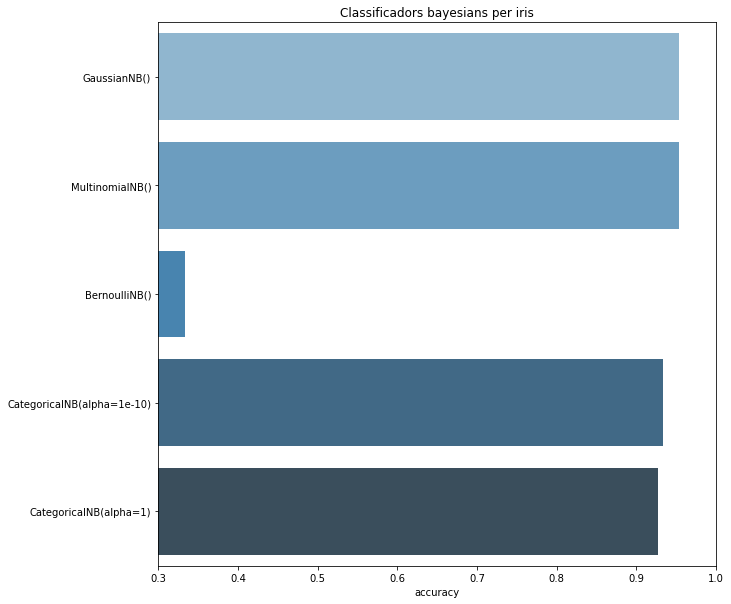

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.barplot(x='iris', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.3,1), title="Classificadors bayesians per iris")

Aquí els dos millors (i empatats) són el GaussianNB i el MultinomialNB. Aquí alguns resultats m'han sorprès i altres no gaire. El que m'ha sorprés bastant és veure que un tipus de classificador bayesià com és el Multinomial, més especialitzat en ocurrències, tingui un valor tan alt a la mateixa alçada que el GaussianNB que és el més conegut quan tenim un seguit d'atributs numèrics continus. M'ho esperava del GaussianNB i no m'ha sorprès gaire al veure els resultats però és molt interessant el que hem obtingut amb el MultinomialNB. Tampoc esperava uns resultats tant positius pels CategoricalNB (tant per Lidstone com per Laplace) i el que havia descartat des d'un principi era el BernoulliNB per treballar amb dades binaries junt amb el MultinomialNB que ja veiem el resultat fora de sèrie que ens ha donat. 

[Text(0.5, 0, 'accuracy'),
 (0.3, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians per playgolf')]

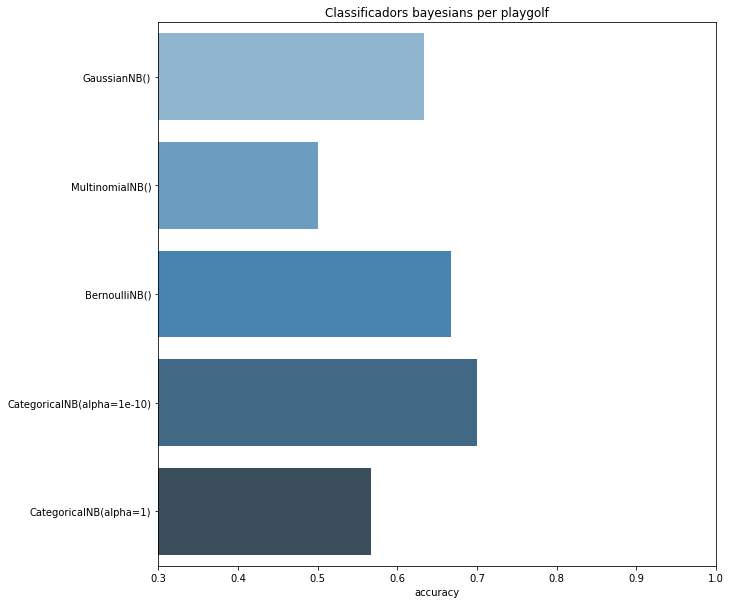

In [53]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='playgolf', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.3,1), title="Classificadors bayesians per playgolf")

Aquí tots els models retornen un accuracy bastant mediocre, veiem que els millors són el CategoricalNB amb suavització Lidstone seguit del BernoulliNB amb accuracy 70-67% respectivament. Es correspòn amb el que haviem dit abans tot i que el accuracy no és gaire interessant, podriem provar amb un altre tipus de codificació per veure si passa el mateix o si ens millora els resultats per codificar les dades d'una manera més adient al problema. 

[Text(0.5, 0, 'accuracy'),
 (0.8, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians per zoo')]

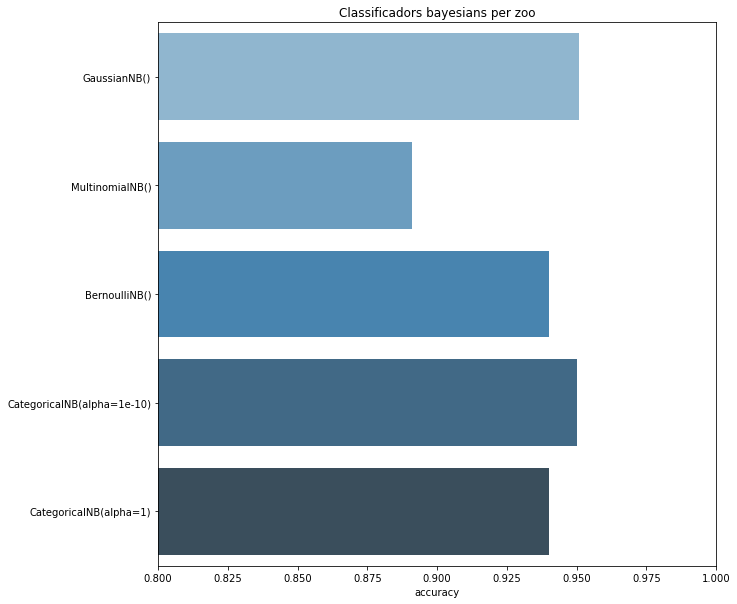

In [54]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='zoo', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.8,1), title="Classificadors bayesians per zoo")

Aquí els dos models que ens donen els millors resultats són tant el GaussianNB com el CategoricalNB amb suavització Lidstone. Potser em sorprén tenir el accuracy que ens dona el GaussianNB perquè la gran majoria dels atributs són binaris amb excepció d'un categòric i no esperava veure el GaussianNB tan elevat perquè està més especialitzat amb atributs numèrics continus. Aleshores pensava que aquí el que ens donaria millors resultats seria el model BernoulliNB però sembla que el GaussianNB fa un molt bon treball amb aquest dataset tot i que inesperat. 

[Text(0.5, 0, 'accuracy'),
 (0.6, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians per heart-disease-uci')]

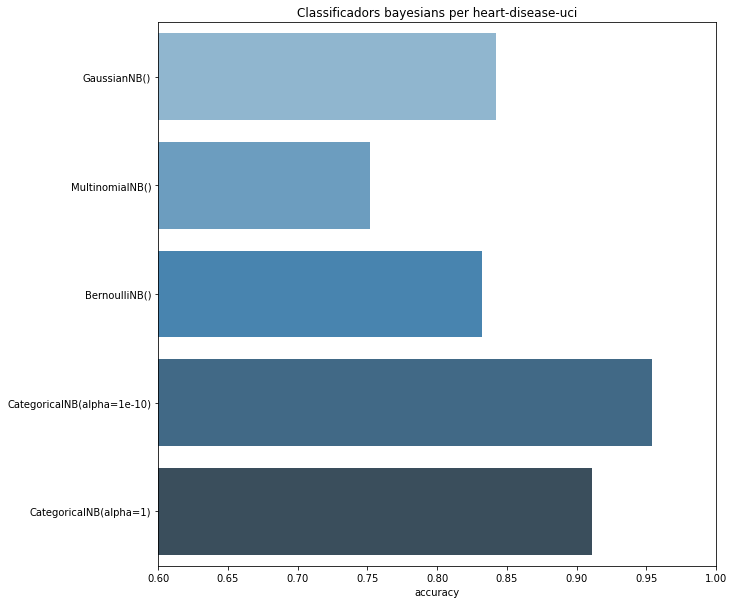

In [52]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='heart-disease-uci', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.6,1), title="Classificadors bayesians per heart-disease-uci")

Aquí el model que ens retorna uns resultats més alts amb diferència és el CategoricalNB fent servir una suavització Lidstone (alpha petita). 

[Text(0.5, 0, 'accuracy'),
 (0.2, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians per 20newsgroups')]

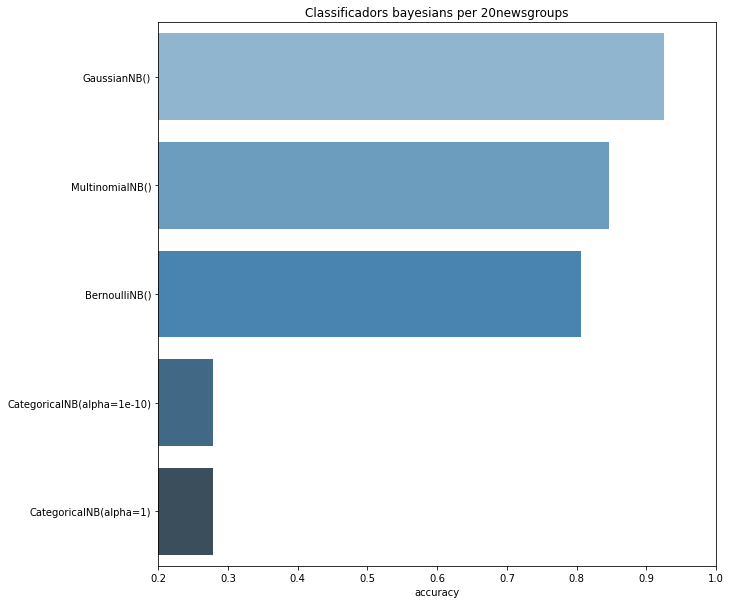

In [50]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='20newsgroups', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.2,1), title="Classificadors bayesians per 20newsgroups")

Pel cas del dataset de text sorprenentment veiem que el MultinomialNB no és el millor classificador en termes d'accuracy sinó el GaussianNB. Realment si ho penso una mica potser te sentit perquè la codificació que he fet servir amb la freqüència inversa de documents on calcula la rellevància diguem per cada paraula que surt al document el que fa és fer les features com a atributs de tipus numèric continu, aleshores aquest model Gaussià en principi també pot funcionar amb aquestes dades tot i que per la naturalesa del problema a priori haguéssim dit que tindriem clares diferències positives al fer servir el MultinomialNB però ens ha sorprés el GaussianNB. 

[Text(0.5, 0, 'accuracy'),
 (0.2, 1.0),
 Text(0.5, 1.0, 'Classificadors bayesians mitjana datasets')]

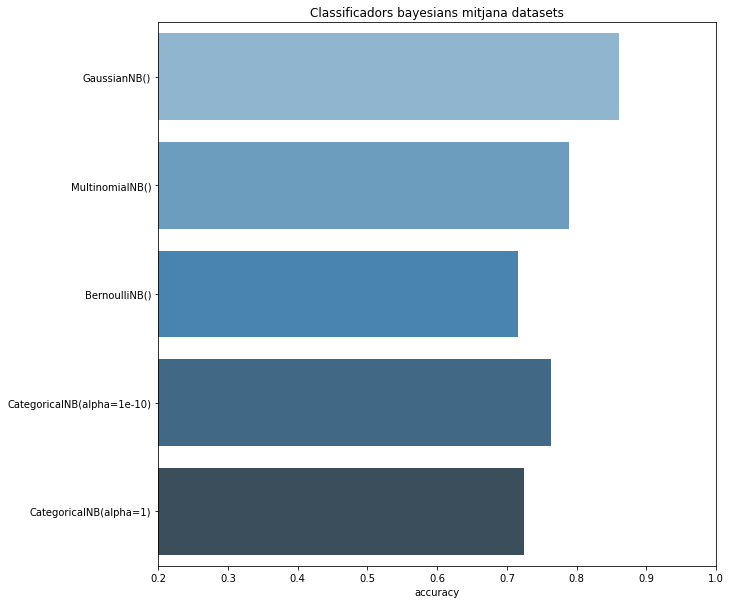

In [51]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='mitjana', y=['GaussianNB()', 'MultinomialNB()', 'BernoulliNB()', 'CategoricalNB(alpha=1e-10)', 'CategoricalNB(alpha=1)'],data=taula_ac_models,palette="Blues_d")
ax.set(xlabel='accuracy', xlim=(0.2,1), title="Classificadors bayesians mitjana datasets")

De mitjana veiem que el classificador més polivalent pels diferents datasets que hem tractat seria el classificador bayesià de GaussianNB amb una mitjana bastant decent de 86% de accuracy. Aquest és el que arriba a donar millors resultats en promig pels diferents problemes que tracten cadascún dels diferents datasets. Després si ens fixem veurem que el MultinomialNB i el CategoricalNB amb suavització Lidstone també arriben a donar-nos uns resultats més o menys asequibles amb una pèrdua d'entre el 10-13% d'accuracy respecte al Gaussià respectivament. Els dos darrers serien el CategoricalNB amb suavització Laplace i finalment el BernoulliNB, més especialitzat per dades binaries i més concret posiblement respecte als altres tot i que arriba a tenir més d'un 70% sobre ser el més baix en accuracy promig. 
Si ens fixem amb les dues versions del CategoricalNB veurem uns resultats bastant bons pels primers 4 datasets, tant per la suavització Lidstone com per la suavització Laplace, just al darrer dataset d'ocurrències de paraules al dataset de text obtenim uns resultats bastant dolents amb un 27% d'accuracy, però per tots els altres datasets els resultats són molt millors, arribant fins a un accuracy molt semblant al Gaussià si fem servir una suavització Lidstone.

#### Pregunta 4: Et sorprenen el resultats? Com és possible que certs models funcionin per dades que en principi no haurien de funcionar? Explica els atributs més importants de cada classificador. Mostra'n exemples i analitza'ls.

Com he dit al anterior apartat detalladament per cada dataset, m'ha sorprès el fet que alguns classificadors que en principi clarament no eren adients al problema que es tractava hagin funcionat en alguns cassos millor que els que jo pensava que ens donarien els resultats més positius. 
Analitzarem un parell de cassos en els que alguns models bayesians que a priori no fariem servir per la naturalesa del problema ens han donat un accuracy molt positiu.  Potser l'explicació d'això seria que alguns models com per exemple el MultinomialNB s'adapta bé per aquells datasets on tenim fenòmens d'ocurrències a les nostres dades, per exemple, la distribució de la longitud de les fulles de les flors (al dataset iris) és diferent segons el tipus de flor que aquesta sigui, tot i tenir tots els atributs de tipus numèric i continu (on pensem en un primer moment que el GaussianNB seria dels més adients) tindrem un fenòmen aquí d'ocurrències on les flors d'una determinada classe tinguin una major proporció d'ocurrència en les fulles entre els 5 i els 6 centímetres i aleshores quan això es doni ens proporcionarà informació realment rellevant per poder classificar la flor d'un tipus o d'un altre diferent. Aleshores tot i nosaltres pensar en que el més adient és el GaussianNB realment no hi ha diferència respecte als resultats obtinguts amb el MultinomialNB. Potser de primeres no ens adonem d'algunes característiques que tenen les nostres dades i després es reflexen al veure uns resultats força bons quan apliquem alguns models que a priori pensavem que no funcionarien. En altres cassos tindrem per exemple datasets amb atributs binaris i altres categòrics, potser en tenim molts més que siguin binaris (8 per exemple) i decidim aplicar un BernoulliNB i veiem que el accuracy de fet és més alt pel cas del CategoricalNB sobre només haver tingut 4 atributs dels 13 presents a la BBDD per exemple. Això es podria donar quan els nostres atributs categòrics expliquen amb més detall el nivell de relació en que una determinada observació sigui assignada a una classe o a una altra, potser els atributs categòrics tenen una major correlació que els binaris tots plegats... També la forma en la que codifiquem les dades doncs  té un clar impacte després en el comportament dels diferents models bayesians al meu parer. 

Mirarem els diferents atributs per cada classificador per poder entendre millor els diferents classificadors bayesians:


En primer lloc tenim el classificador GaussianNB que com atributs més interessants tindriem el class_prior que seria la probabilitat per cada classe, tindriem també l'atribut classes_ que serien les etiquetes de classe pel classificador, el n_features_in_ que serien el nombre de features al fit, el var_ que ens explica la variança per cada feature per classe i el theta_ que és la mitjana de cada feature per classe mentre que el sigma_ seria la variança. El epsilon també és interessant i seria el valor aditiu a les variances. 

Per una altra banda tenim el classificador MultinomialNB que com atributs més importants veiem: class_count que seria el nombre de mostres trobades per cada classe al llarg del procés d'entrenament. El class_log_prior_ seria la probabilitat logarítmica suavitzada per cada classe, classes_ que serien les etiquetes classes conegudes pel classificador, feature_count que és el atribut que ens explicaria el nombre de mostres trobades per cada classe i feature al llarg del procés d'entrenament, feature_log_prob_ que és la probabilitat logarítmica empírica dels features donada una classe, osigui la probabilitat de x_i donada y (P(x_i|y)). Després tenim el n_features_in_ que és el nombre de features vistes al entrenament i finalment el atribut features_names_in_ que serà el nombre de features vistes all entrenament però només es definirà quan x tingui features que siguin strings. 

Pel cas del BernoulliNB si ens fixem amb els seus atributs no en veurem de nous, té els mateixos atributs que el darrer model de MultinomialNB. 

Finalment pel cas del classificador bayesià CategoricalNB veurem els següents atributs: el category_count serien arrays del tipus (numero_classes, numero_classes_duna_categoria) per cada categoria. Cada array ens donaria el numero de mostres trobades per cada classe i categoria d'una feature concreta. El class_count_ seria el nombre de mostres trobades per cada classe durant l'entrenament que pot ser ponderat en cas d'especificar-ho. El class_log_prior_ seria la probabilitat logarítmica suavitzada per cada classe, el atribut classes_ seria les labels conegudes per cada classificador. El feature_log_prob_ tindria un seguit d'arrays del mateix tipus que els del atribut que hem especificat abans (category_count_) amb l'excepció que en aquest atribut els arrays contindràn les probabilitats logarítmiques de categories donades una feature i una classe (P(x_i|y)). El n_features_in_ i el atribut features_names_in_ serien iguals que en el cas del MultinomialNB i finalment aquí tindriem l'atribut n_categories_ que a diferència del primer que hem descrit aquest ens diria el nombre de categories per cada feature, un valor que es podria inferir de les dades o que podria ser fixat pel nombre mínim de categories.

#### Pregunta 5: Si el nostre dataset conté dades de diferent naturalesa, és a dir, uns atributs categorics, d'altres continus, d'altres binaris, creus que es podrien combinar els diferents classificadors de bayes? Seguint la formula original, com es faria? 

Si, podriem definir diferents classificadors per obtenir una millora en la precissió de tot el model. Tot seguit provarem a fer una prova sobre un dels datasets que hem analitzat, en aquest cas escullo el dataset "playgolf" per veure si podem millorar el accuracy perquè com podem veure és el més pessimista en termes de accuracy. En aquest cas tenim la meitat dels atributs de tipus categòric i l'altra meitat són atributs binaris. Aleshores combinarem un model bayesià BernoulliNB i un CategoricalNB amb suavització Lidstone perquè com hem vist en els apartats anteriors sembla funcionar millor que amb una suavització de tipus Laplace. 

In [14]:
import numpy as np
from statistics import mean
at_categorics = dataGolf[["Outlook", "Temperature"]]
at_binaris = dataGolf[["Humidity", "Windy"]]
at_target = dataGolf["PlayGolf"]
L=[]
for i in [at_categorics, at_binaris]:
    codificador = OrdinalEncoder()
    codificador.fit(i)
    trans = codificador.transform(i)
    L.append(trans)

X = np.c_[L[0][:,0].ravel(), L[0][:,1].ravel(), L[1][:,0].ravel(), L[1][:,1].ravel()]
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(X[:,0:2], at_target)
model_Categorical = CategoricalNB(alpha=1e-10)
model_Categorical.fit(X[:,2:4], at_target)

pred_bin = model_Bernoulli.predict_proba(X[:,0:2])
pred_categ = model_Categorical.predict_proba(X[:,2:4])
nou_X = np.c_[(pred_bin[:,:], pred_categ[:,:])]

model_final = GaussianNB()
model_final.fit(nou_X, at_target)
print("CROSSVALIDACIÓ dataset PlayGolf\nModel híbrid amb models bayesians BernoulliNB i CategoricalNB (suavització Lidstone):\n")
print("Mitjana de les crossvalidacions: "+str(round(mean(cross_val_score(model_final, nou_X, at_target)),3)))


CROSSVALIDACIÓ dataset PlayGolf
Model híbrid amb models bayesians BernoulliNB i CategoricalNB (suavització Lidstone):

Mitjana de les crossvalidacions: 0.733


Aleshores com podem veure aquest model híbrid que fa servir un model Bernoulli i un Categorical amb suavització Lidstone ens millora el accuracy de la crossvalidació. La millora és d'un 3,3% més de accuracy respecte al més alt que haviem aconseguit que era el CategoricalNB(alpha=1e-10), no és gaire en aquest cas però com podem comprovar si combinem diferents models que s'ajustin millor als diferents atributs es pot traduïr en un increment del accuracy de les prediccions. Realment un cop sabem com fer aquests models híbrids no costa gaire fer-ho per tenir millors resultats. Per petita que sigui la millora, no deixa de ser millora i en el camp del machine learning això ens interesse bastant mentre no augmenti desmesuradament la complexitat del problema, cosa que es tradueix amb un increment de recursos computacionals requerits per calcular els resultats. 

El que he fet en aquest apartat és agafar els nostres atributs sobre els que volem calcular les probabilitats i dividir-los en dos subgrups, els atributs de tipus categòric i aquells que són binaris. Un cop els tenim dividits el que fem és codificar-los amb el OrdinalEncoder, els fiquem tots junts un altre cop a un array per poder treballar com si fos el conjunt X tot plegat. Tot seguit simplement el que hem de fer és definir els dos classificadors bayesians amb els que volem treballar (GaussianNB i CategoricalNB(alpha=1e-10)) i ajustar-los amb els seus respectius atributs. Un cop tenim això el que volem és fer servir tots dos models en un sol, és a dir, barrejar els dos models, aleshores això ho faig fent unes prediccions sobre els models definits (ens treu probabilitats pels dos models) i un cop hem fet això tornem a redefinir el conjunt X amb les probabilitats dels dos models que ara tindrà valors continus. 
Per aquest conjunt nou amb valors continus el que necessitem és el millor model que pugui treballar amb aquestes dades, aleshores creem un model gaussià i l'ajustem amb el conjunt que tot just acabem de crear. Un cop el tenim ajustat ja podem fer les crossvalidacions i veure els resultats dels dos models plegats. Aleshores podem barrejar diferents classificadors bayesians treient les prediccions amb probabilitats per cadascún d'ells i després "unificant" aquest format sobre un nou conjunt que podem aplicar a un GaussianNB per exemple.

## B. Implementació Naive Bayes (40%)

En aquest apartat implementarem un classificador Ingenu de Bayes per cada un dels tipus de dades. Per fer això, i que sigui fàcil de comparar amb els resultats del apartat anterior, feu servir un esquelet similar al següent:
        


#### Pregunta 0: Implementem métode calcular_prior():

### NaiveBayes Base

In [6]:
class NaiveBayes(object):
    def __init__(self, alpha):
        self.alpha = alpha
        self.n_samples = 0
        self.class_count_ = []  # numero de exemples de cada categoria
        self.class_prior_ = []  # prior per cada categoria
        self.classes_ = []      # nom o etiqueta de cada label
        

    def __str__(self):
        # toString()  
        return (self.__class__.__name__+"()")
        
    def calcular_conditional(self, X, y):
        """
        Compute the conditional probability for the training data for each feature
        """
        raise("TO BE DONE. Ho heu que implementar per cada subclasse")
    
    def calcular_likelihood_log(self, X):
        """
        Compute the unnormalized posterior log probability of X
        """
        raise("TO BE DONE. Ho heu que implementar per cada subclasse")

    def calcular_prior(self, y):
        """
        Compute the class prior
        """
        try:
            temp = list(y.value_counts())
        except AttributeError:
            nou_y = pd.DataFrame(y)
            temp = list(nou_y.value_counts())
            
        suma = sum(temp)
        for x in range(len(temp)):
            temp[x]=temp[x]/suma
            
        self.class_prior_ = temp
            
    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X):
        probs = np.exp(self.predict_log_proba(X))
        total_sum = np.sum(probs, axis=1)
        for i in range(len(self.classes_)):
            probs[:,i] /= total_sum
        return probs

    def predict_log_proba(self, X):
        probs = self.calcular_likelihood_log(X)
        for i in range(len(self.classes_)):
            probs[:][i] += np.log(self.class_prior_[i])
       
        return probs

    
    def score(self, X, y):
        return np.sum(self.predict(X) == y) / len(y)
        
    def fit(self, X, y):

        self.n_samples = X.shape[0]
        self.classes_ = np.unique(y)

        # calcular p(y)
        self.calcular_prior(y)
        
        # per cada una de les columnes de x
        for i in range(X.shape[1]):
            # calcular p(xi | y)
            self.calcular_conditional(X, y)
        


#### Pregunta 1: Implementem el GaussianNaiveBayes: 

### GaussianNaiveBayes

In [24]:
from math import e

class GaussianNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.theta_ = None  # mean
        self.sigma_ = None  # var
        

    def calcular_conditional(self, X, y):
        
        temp = pd.concat([X,y],axis=1)
        target = temp.columns[-1]
        self.theta_ = temp.groupby([target]).mean().to_numpy()
        self.sigma_ = temp.groupby([target]).var().to_numpy()
                             
    def calcular_likelihood_log(self, X):

        prob = np.ones((X.shape[0],len(self.classes_)))
        for fila in range(X.shape[0]):
            for columna in range(X.shape[1]):
                element_i = X.iloc[fila][columna]
                for label in range(len(self.classes_)):
                    den = (self.sigma_[label][columna]*np.sqrt(2*np.pi))
                    prob[fila,label]+=np.log((1/den) * e**(-(element_i-self.theta_[label][columna])**2/(2*(self.sigma_[label][columna])**2)))
        return prob

In [31]:
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X, y = load_dataset("iris-bayes_imp")
model_gaussia = GaussianNaiveBayes()
model_gaussia.fit(X,y)
print("Tenim un accuracy al dataset iris fent servir un classificador implementat basat en GaussianNaiveBayes de: "+str(model_gaussia.score(X,y)))
model_gaussia_sklearn = GaussianNB()
model_gaussia_sklearn.fit(X,y)
print("Tenim un accuracy al dataset iris fent servir el classificador GaussianNB de sklearn de :"+str(model_gaussia_sklearn.score(X,y)))

Tenim un accuracy al dataset iris fent servir un classificador implementat basat en GaussianNaiveBayes de: 0.94
Tenim un accuracy al dataset iris fent servir el classificador GaussianNB de sklearn de :0.96


<ipython-input-24-2df30057ec1f>:25: RuntimeWarning: divide by zero encountered in log
  prob[fila,label]+=np.log((1/den) * e**(-(element_i-self.theta_[label][columna])**2/(2*(self.sigma_[label][columna])**2)))


Com podem veure els resultats pel que fa al accuracy són bastant propers l'un de l'altre. Al que hem implementat tenim un accuracy d'un 94% mentre que amb el de sklearn tenim un guany d'un 2% arribant al 96%. Entenc que he fet bé aquesta implementació per les diferents proves que he anat fent veient aquests resultats i te sentit que les funcions de sklearn ens donin un accuracy més elevat per la precissió de càlcul que hi haurà amb la seva implementació i amb una major robustesa pel que fa als models matemàtics més estesos que potser apliquen en aquestes implementacions. Amb aquest model de scratch que hem fet ja obtenim uns resultats satisfactoris i ens ajuda a comprendre una mica millor el mètode Gaussià. 

#### Pregunta 2: Implementa el CategoricalNaiveBayes:

Aquí després d'una bona estona intentant treure aquest classificador finalment no m'ha donat temps per acabar de debuggar-lo, veure els errors i acabar de fer-lo funcional però crec que la meva idea és bastant propera al que realment és el CategoricalNB. Per qüestions d'altres entregues i exàmens malauradament no hi ha arribat a acabar aquest apartat però crec que puc demostrar mínimament haver repassat el model i haver-ho intentat amb una idea que penso que no és fidel al que fa aquest classificador.  

### CategoricalNaiveBayes

In [26]:
class CategoricalNaiveBayes(NaiveBayes):
    def _init_(self, alpha=1):
        super()._init_(alpha)
        self.category_count_ = []
        self.feature_log_prob_ = []
            
    def calcular_conditional(self, X, y):
        features = X.shape[1]
        classes = y.shape[1]
        
        for i in range(features):
            feature_compt = []
            feature_i = X[:,i]
            for j in range(classes):
                conjunt = y[:,j].astype(bool)
                compt = np.bincount(feature_i[conjunt])
                
                feature_compt.append(compt)
            
            self.category_count_.append(np.array(feature_compt))

    def calcular_likelihood_log(self, X):
        for i in range(X.shape[1]):
            numerador = self.category_count_[i] + self.alpha
            denominador = numerador.sum(axis=1).reshape(-1,1)
            prob = np.log(numerador) - np.log(denominador)
            
            self.feature_log_prob_.append(prob.tolist())
        

        return self.feature_log_prob_

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import CategoricalNB 

X, y = load_dataset("playgolf")
X = X.astype("int")
binaritzador_target = LabelBinarizer()
y_bin = binaritzador_target.fit_transform(y)
if y_bin.shape[1] == 1:
    y_bin = np.concatenate((1 - y_bin, y_bin), axis=1)
model_categoric = CategoricalNaiveBayes(alpha=0.01)
model_categoric.fit(X,y_bin)
print("Tenim un accuracy amb el CategoricalNaiveBayes implementat de: "+str(model_categoric.score(X,y)))
model_categoric_sklearn = CategoricalNB()
model_categoric_sklearn.fit(X, y)
print("Tenim un accuracy amb el CategoricalNB de sklearn de: "+str(model_categoric_sklearn.score(X,y)))

#### Pregunta 3: Compara els resultats obtinguts amb els de sklearn. S'assemblen?

Tal i com he dit al apartat del GaussianNB, els resultats que he obtingut penso que s'assemblen bastant als que obtenim amb les funcions implementades de sklearn. Obviament sempre hi haurà una petita desviació pel que fa al accuracy perquè imagino que les funcions de sklearn estaràn programades per matemàtics i/o enginyers més especialitzats en programació científica i experts en aquest camp i aleshores els models matemàtics que hi haurà al darrere segur que seràn mes robustos i estesos que la nostra implementació podent arribar a obtenir un accuracy més elevat per aquestes funcions ja implementades de sklearn. Aleshores com hem pogut veure s'han comparat els resultats i hem vist que els resultats s'assemblen bastant.

### MultinomialNaiveBayes

In [ ]:
class MultinomialNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.feature_log_prob_ = []

    def calcular_conditional(self, X, y):
        # todo
        # calcular self.feature_log_prob_ segons la formula corresponent


    def calcular_likelihood_log(self, X):
        # todo
        # dot product entre les features i les vostres probabilitats calculades     
        pass

#### Preguntes
Per aquest apartat, intenteu de fer-ho en python directament, per a poder debugar el codi més fàcilment. Compareu el vostre resultat amb el de sklearn. Feu-ho també per passos intermitjos, i veure que ho esteu fent correctament.

1. Implementa $P(x_i|y)$ per dades categoriques (Categorical Naive Bayes)
2. Implementa $P(x_i|y)$ per dades continues (Gaussian Naive Bayes)
3. Compara els resultats obtinguts amb els de sklearn. S'assemblen?
4. (opcional) Implementa $P(x_i|y)$ per dades ordinals (Multinomial Naive Bayes) (+1pts)


## Appendix 
#### (no s'hi ha de fer res, tan sols es per si us ajuda a entendre-ho tot millor)

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*Aquesta subsecció conté parts extretes de [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; i està disponible a [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*



Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.

These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

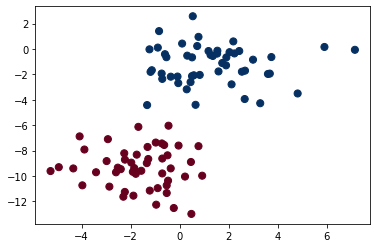

In [96]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

The result of this naive Gaussian assumption is shown in the following figure:

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Now let's generate some new data and predict the label:

In [98]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

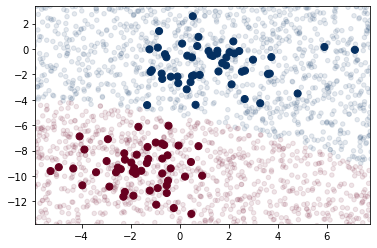

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [100]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [101]:
model.classes_

array([0, 1])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [82]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [104]:
categories_m = ['talk.religion.misc', 'soc.religion.christian',
            'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories_m)
test = fetch_20newsgroups(subset='test', categories=categories_m)

Here is a representative entry from the data:

In [105]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Show the distributions of lengths of the emails

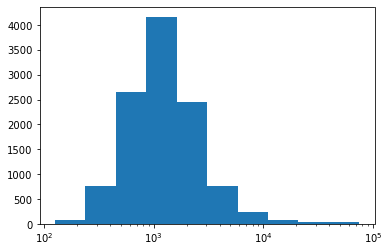

In [85]:
import numpy as np
import matplotlib.pyplot as plt 

lens = [len(d) for d in train.data]

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(lens, 10)


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [38]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

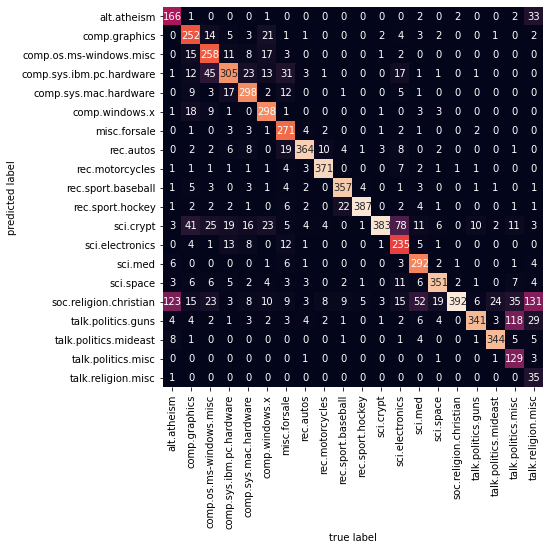

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(10,7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [178]:
from sklearn.metrics import classification_report
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

In [179]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [90]:
predict_category('sending a payload to the ISS')

'sci.space'

In [91]:
predict_category('sending bytes to the network')

'comp.graphics'

In [92]:
predict_category('sending chocolate')

'sci.space'

In [93]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [94]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


